Importer les bibliothèques nécessaires

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
from matplotlib import rc
rc('text', usetex=True)  # LaTeX

Remplir la liste des pays

In [78]:
pays = ['France', 'Chine', 'USA', 'Norvege', 'Bangladesh', 'Russie', 'Inde', 'Australie', 'Japon', 'Bresil']
print('Nombre de pays : %d' % len(pays))

Nombre de pays : 10


## Remplir la liste de données pour les abscisses (à entrer dans le même ordre que pour la liste "pays") : 
le pourcentage d'utilisateurs d'internet dans la population du pays (en % de la population totale)

source des données : https://en.wikipedia.org/wiki/List_of_countries_by_number_of_Internet_users

In [79]:
internet_users = [80.5,69.27,96.26,96.51,85.39,90.87,55.40,86.54,76.01,75.12]
print(len(internet_users))

10


## Remplir la liste de données pour les ordonnées (à entrer dans le même ordre que pour la liste "pays") :
l'empreinte écologique du pays (en hag/hab)

source des données : https://fr.wikipedia.org/wiki/Liste_des_pays_par_empreinte_%C3%A9cologique


In [80]:
empreinte_eco = [5.14,3.38,8.22,4.98,0.72,5.69,1.16,9.31,5.02,3.11]
print(len(empreinte_eco))

10


Définir le nombre de pays pris en compte

In [81]:
nb_pays = len(pays)

In [82]:
x = np.arange(0,120+120/(nb_pays+1),120/(nb_pays-1))
y = 0.1*x+1
print(x)

[  0.          13.33333333  26.66666667  40.          53.33333333
  66.66666667  80.          93.33333333 106.66666667 120.        ]


Tracer le graphe

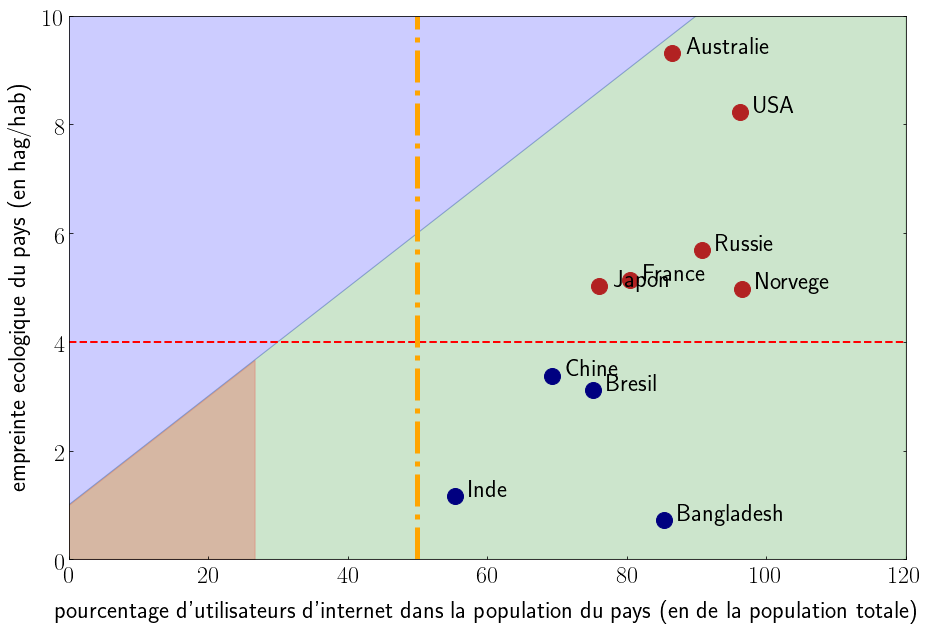

In [90]:
fig, ax=plt.subplots(figsize=(15, 10))

for i in range(nb_pays) : # boucle pour tracer les points pays par pays
    if empreinte_eco[i]>4 : # condition pour afficher les pays d'une certaines couleur
        ax.plot(internet_users[i], empreinte_eco[i], 'o', markersize=16, color='firebrick')
    else :
        ax.plot(internet_users[i], empreinte_eco[i], 'o', markersize=16, color='navy')
    plt.annotate(f'{pays[i]}', color='black', fontsize=24, style='italic',xy=(internet_users[i],empreinte_eco[i]), xytext=(internet_users[i]+2,empreinte_eco[i]))
    # annotate permet d'écrire du texte sur un graphique, ici le nom du pays associé à chaque point (x,y)

# nom des axes, taille de la police et espacement de nom par rappor à l'axe
#plt.xlabel(r'${\rm pourcentage d utilisateurs d internet dans la population du pays (en  de la population totale)}$',fontsize=22, labelpad=12)
#plt.ylabel(r'${\rm empreinte ecologique du pays (en hag/hab)}$',fontsize=22, labelpad=12)

plt.xlabel('pourcentage d\'utilisateurs d\'internet dans la population du pays (en  de la population totale)',fontsize=24, labelpad=12)
plt.ylabel('empreinte ecologique du pays (en hag/hab)',fontsize=24, labelpad=12)


# taille et style des axes
ax.tick_params(labelsize=24)
ax.xaxis.set_tick_params(direction="in", which="both")
ax.yaxis.set_tick_params(direction="in", right=True, which="both")

# limite du tracé en x et en y
plt.xlim(0,120)
plt.ylim(0,10)

# tracer une ligne horizontale
ax.axhline(4, color='red', linestyle='--', linewidth=2)
# tracer une ligne verticale
ax.axvline(50,color='orange', linestyle='-.', linewidth=5)

# definir les zones colorées en arrière-plan
ax.fill_between(x,y, color='green', alpha=0.2)
ax.fill_between(x,y,where=empreinte_eco>y, color='red', alpha=0.2)
ax.fill_between(x,y,10, color='blue', alpha=0.2)

plt.savefig('./diagramme.pdf', bbox_inches='tight')